In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/data.csv')

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df.shape

(1000, 8)

In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [16]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
print("Categories in 'gender' variable : ",end = " ")
print(df['gender'].unique())

print("Categories in 'race/ethn' variable : ",end = " ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental ed' variable : ",end = " ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable : ",end = " ")
print(df['lunch'].unique())

print("Categories in 'test prep' variable : ",end = " ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable :  ['female' 'male']
Categories in 'race/ethn' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental ed' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :  ['standard' 'free/reduced']
Categories in 'test prep' variable :  ['none' 'completed']


In [23]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(numeric_features, '\n', categorical_features)

['math_score', 'reading_score', 'writing_score'] 
 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [25]:
df['average'] = np.round((df['reading_score'] + df['math_score'] + df['writing_score'])/3,0)
df['average'] = np.round(np.sum(df['reading_score'],df['math_score'],df['writing_score'])/3,0)


<Axes: xlabel='average', ylabel='Count'>

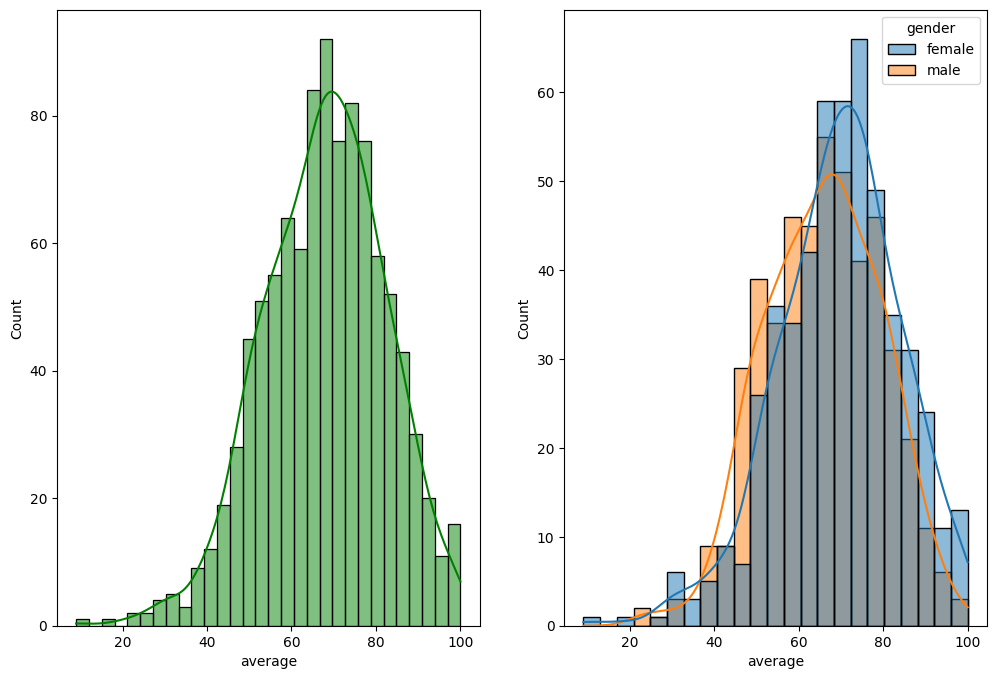

In [26]:
fig,axs = plt.subplots(1,2,figsize = (12,8))
plt.subplot(121)
sns.histplot(data=df,x = 'average', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue = 'gender')